# XG Boost Classification

## Importing the libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns


## Importing the dataset

In [44]:
dataset = pd.read_csv('train2023.csv')
dataset.head()

,index,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,0,34.521450,40000,134029.0,191990.0,DebtCon,Mgr,NaN,1.0,0.0,178.780960,0.0,24.0,0
1,1,34.357866,25500,113204.0,184561.0,DebtCon,Sales,17.0,1.0,0.0,308.958198,1.0,31.0,0
2,2,25.623639,26000,20119.0,54563.0,DebtCon,Other,24.0,0.0,0.0,126.987959,0.0,11.0,0
3,3,38.217726,8700,77377.0,97070.0,DebtCon,Mgr,3.0,0.0,0.0,68.854877,2.0,24.0,0
4,4,41.538051,15800,51281.0,144202.0,DebtCon,Other,1.0,0.0,0.0,285.997898,4.0,43.0,0


In [45]:
## Looking data shape
print(dataset.shape)

(4768, 14)


In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    4768 non-null   int64  
 1   DEBTINC  3741 non-null   float64
 2   LOAN     4768 non-null   int64  
 3   MORTDUE  4365 non-null   float64
 4   VALUE    4680 non-null   float64
 5   REASON   4568 non-null   object 
 6   JOB      4550 non-null   object 
 7   YOJ      4357 non-null   float64
 8   DEROG    4193 non-null   float64
 9   DELINQ   4300 non-null   float64
 10  CLAGE    4531 non-null   float64
 11  NINQ     4352 non-null   float64
 12  CLNO     4592 non-null   float64
 13  BAD      4768 non-null   int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 521.6+ KB


In [47]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
index,4768.0,2383.500000,1376.547372,0.000000,1191.750000,2383.500000,3575.250000,4767.000000
DEBTINC,3741.0,33.864152,8.141801,0.720295,29.220351,34.871855,39.077814,144.189001
LOAN,4768.0,18595.050336,11143.678091,1300.000000,11100.000000,16300.000000,23400.000000,89900.000000
MORTDUE,4365.0,74254.645874,44203.791750,2063.000000,46775.000000,65889.000000,92613.000000,399412.000000
VALUE,4680.0,102884.609090,58579.950268,8800.000000,66527.000000,89789.000000,121733.500000,855909.000000
YOJ,4357.0,8.868442,7.535995,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,4193.0,0.254472,0.867605,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,4300.0,0.458140,1.124849,0.000000,0.000000,0.000000,0.000000,13.000000
CLAGE,4531.0,179.442286,85.609878,0.000000,115.543501,172.799301,230.711163,1168.233561
NINQ,4352.0,1.181756,1.733127,0.000000,0.000000,1.000000,2.000000,17.000000


In [48]:
dataset.isnull().sum().sort_values(ascending=False)

DEBTINC    1027
DEROG       575
DELINQ      468
NINQ        416
YOJ         411
MORTDUE     403
CLAGE       237
JOB         218
REASON      200
CLNO        176
VALUE        88
index         0
LOAN          0
BAD           0
dtype: int64

In [49]:
## burada her değişkenin içindeki eksik değer oranını buluyoruz
## 1- eksik değerleri olan özelliklerin listesini yapın
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>0]
## 2- özellik adını ve eksik değerlerin yüzdesini yazdırın

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % eksik değer')

DEBTINC 0.2154  % eksik değer
MORTDUE 0.0845  % eksik değer
VALUE 0.0185  % eksik değer
REASON 0.0419  % eksik değer
JOB 0.0457  % eksik değer
YOJ 0.0862  % eksik değer
DEROG 0.1206  % eksik değer
DELINQ 0.0982  % eksik değer
CLAGE 0.0497  % eksik değer
NINQ 0.0872  % eksik değer
CLNO 0.0369  % eksik değer


In [50]:
# sayısal değişkenlerin listesi
numerical_features_1 = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features_1))

# sayısal değişkenleri görelim
dataset[numerical_features_1].head()

Number of numerical variables:  12


,index,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,0,34.521450,40000,134029.0,191990.0,NaN,1.0,0.0,178.780960,0.0,24.0,0
1,1,34.357866,25500,113204.0,184561.0,17.0,1.0,0.0,308.958198,1.0,31.0,0
2,2,25.623639,26000,20119.0,54563.0,24.0,0.0,0.0,126.987959,0.0,11.0,0
3,3,38.217726,8700,77377.0,97070.0,3.0,0.0,0.0,68.854877,2.0,24.0,0
4,4,41.538051,15800,51281.0,144202.0,1.0,0.0,0.0,285.997898,4.0,43.0,0


In [51]:
import missingno as msn

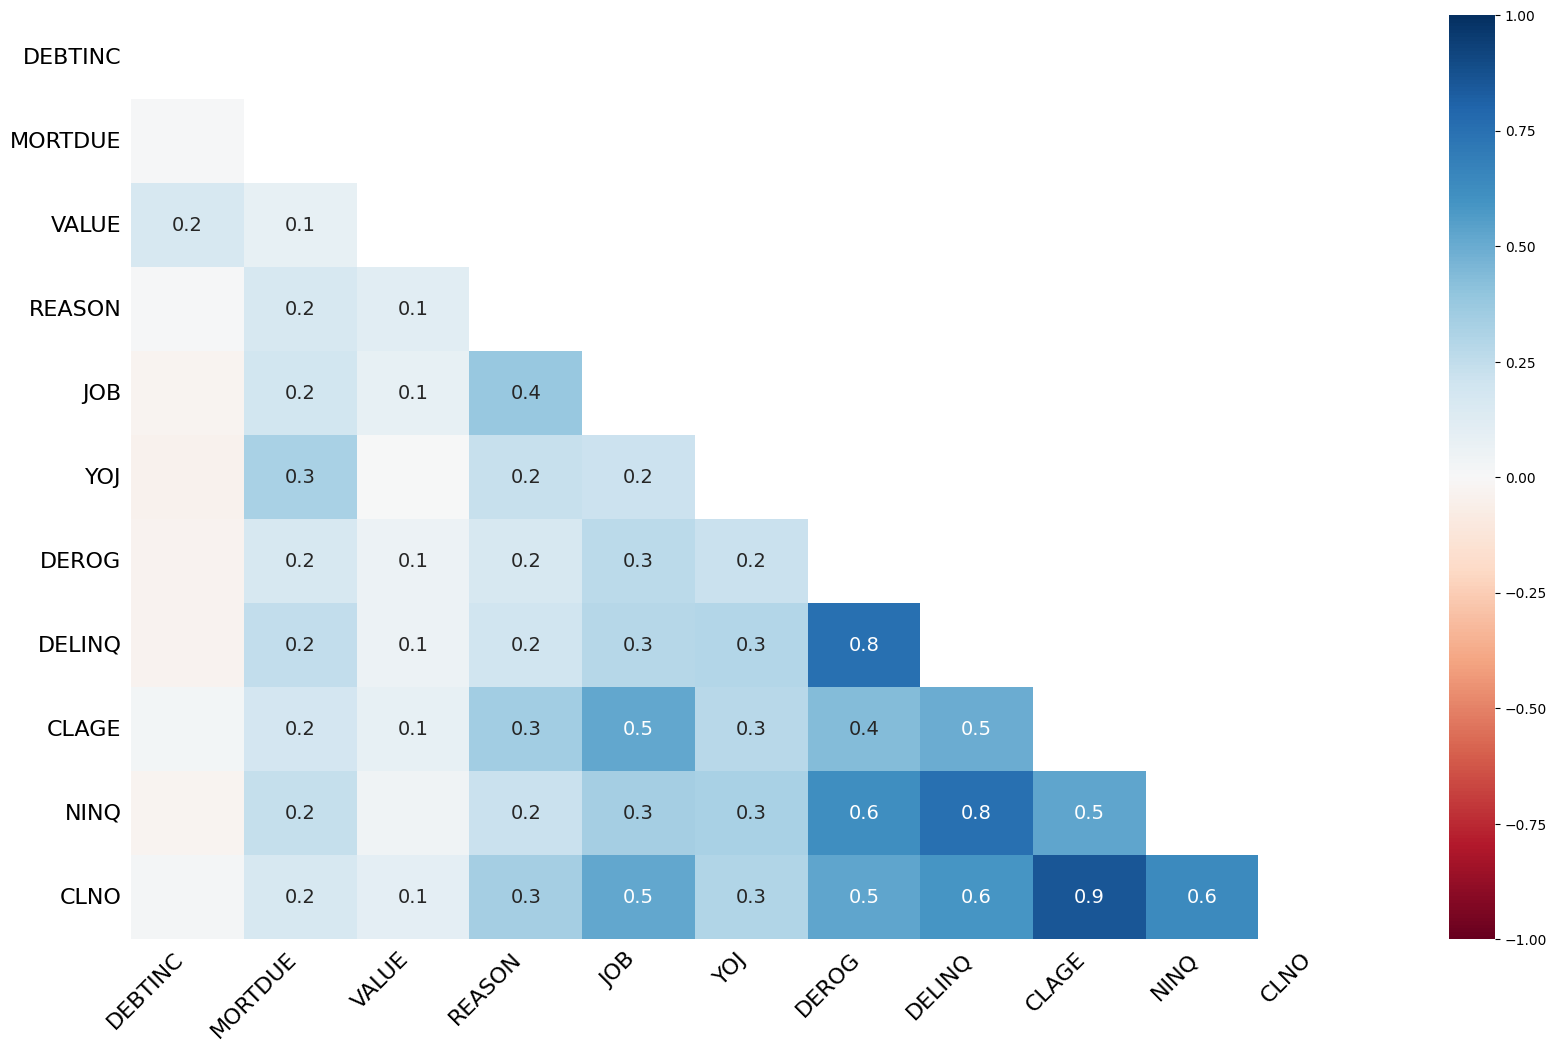

In [52]:
msn.heatmap(dataset[features_with_na]);

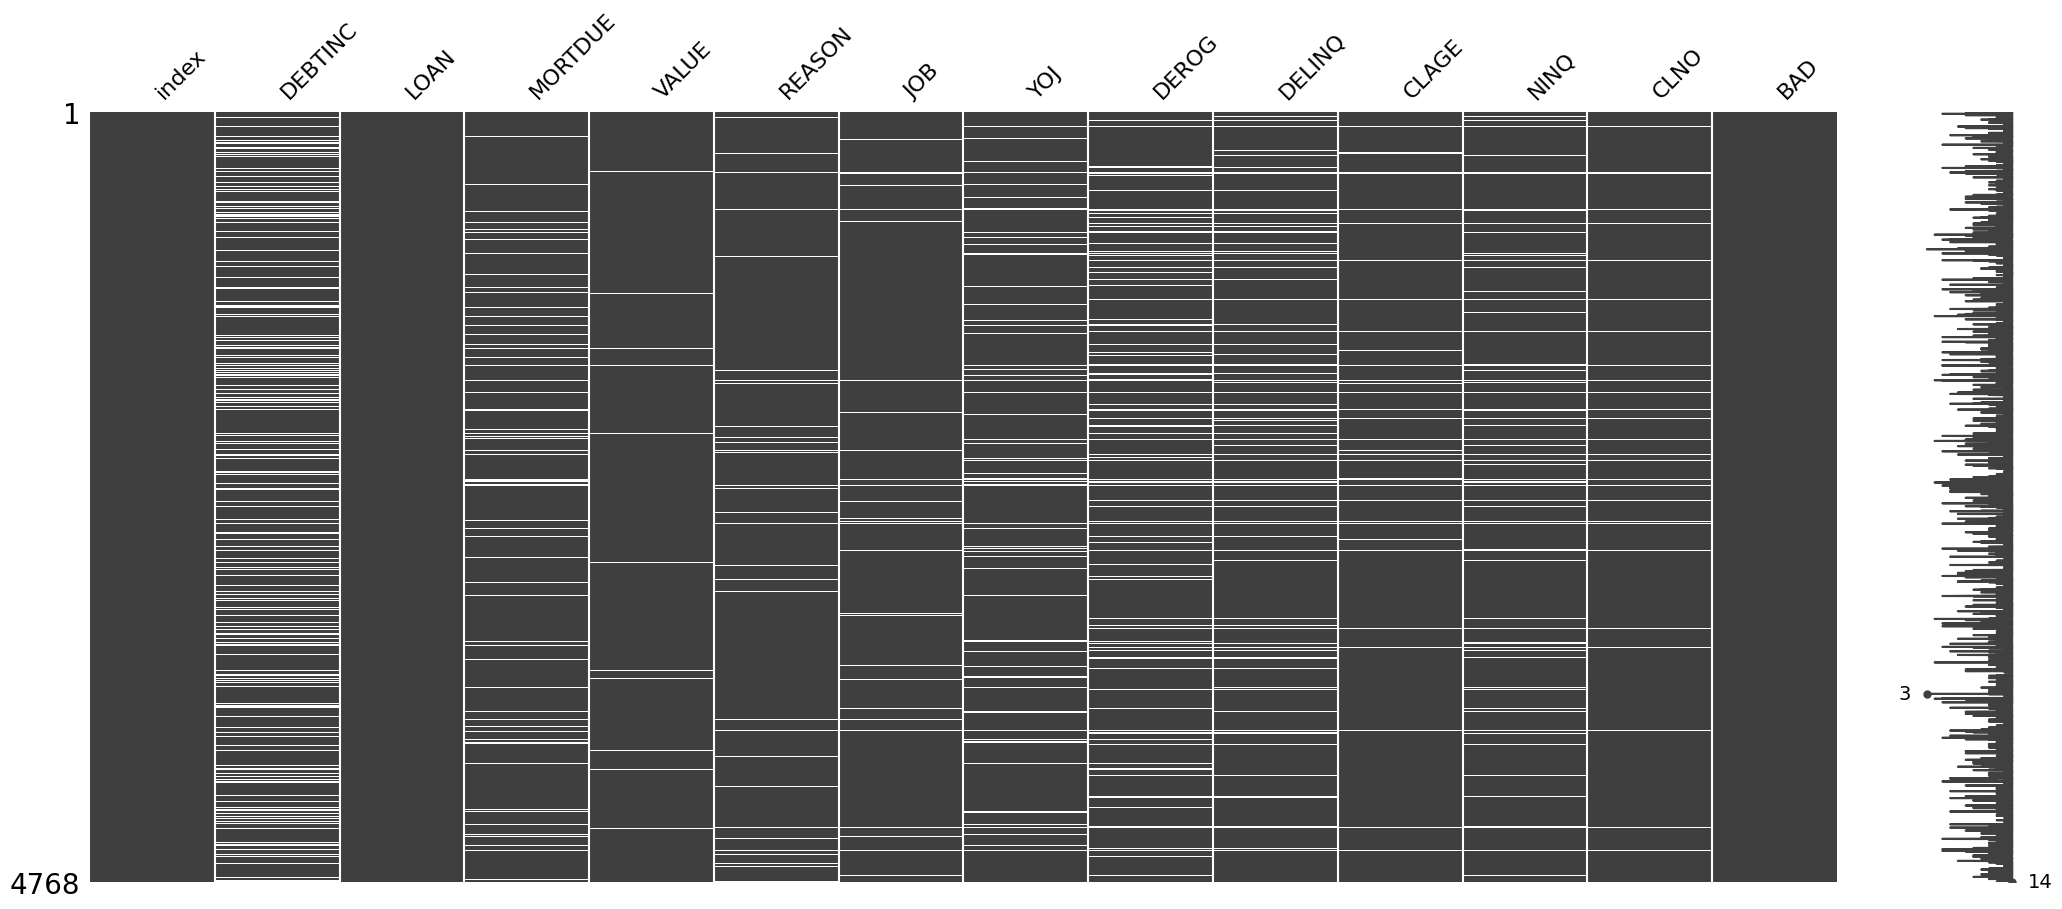

In [53]:
msn.matrix(dataset);

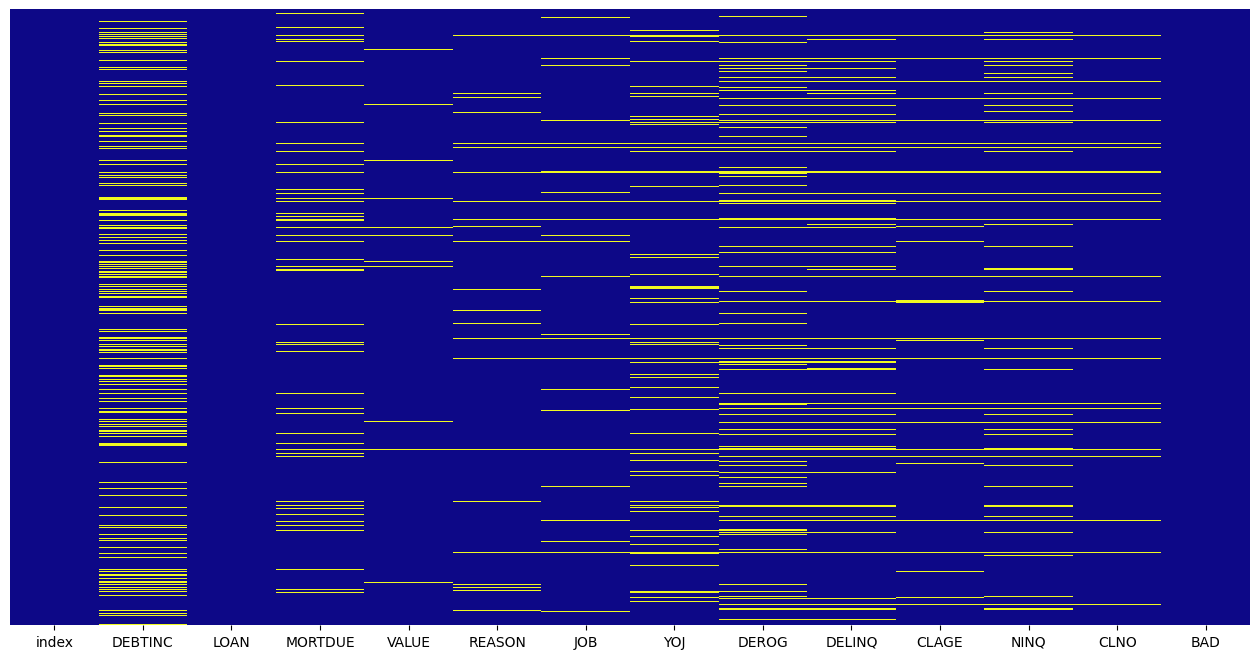

In [54]:
plt.rcParams["figure.figsize"] = (16, 8)
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap="plasma");

##Missing value

In [55]:
dataset.head()

,index,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,0,34.521450,40000,134029.0,191990.0,DebtCon,Mgr,NaN,1.0,0.0,178.780960,0.0,24.0,0
1,1,34.357866,25500,113204.0,184561.0,DebtCon,Sales,17.0,1.0,0.0,308.958198,1.0,31.0,0
2,2,25.623639,26000,20119.0,54563.0,DebtCon,Other,24.0,0.0,0.0,126.987959,0.0,11.0,0
3,3,38.217726,8700,77377.0,97070.0,DebtCon,Mgr,3.0,0.0,0.0,68.854877,2.0,24.0,0
4,4,41.538051,15800,51281.0,144202.0,DebtCon,Other,1.0,0.0,0.0,285.997898,4.0,43.0,0


In [56]:
dataset.drop("index", axis=1, inplace=True)

In [57]:
#CLNO sutunu ile CLAGE bir biri ile bagli ve NINQ   CLAGE: Ay cinsinden en eski kredi limitinin yaşı, NINQ: Son kredi sorgularının sayısı, CLNO: Kredi limiti sayısı
# CLNO sütunundaki NaN değerlere 0 verme
dataset["CLNO"].fillna(0, inplace=True)

# CLNO sütunundaki 0 değerine denk gelen satırların CLAGE sütunundaki NaN değerlerini 0 ile doldurma
dataset.loc[dataset["CLNO"] == 0, "CLAGE"] = 0

# Geri kalan NaN değerlere ilgili sütunların ortalamasını uygulama
columns_to_fillna_mean = ["CLAGE"]
for column in columns_to_fillna_mean:
    dataset[column].fillna(dataset[column].mean(), inplace=True)


In [58]:
correlation_matrix = dataset[['NINQ', 'DELINQ']].corr()
print(correlation_matrix)


            NINQ    DELINQ
NINQ    1.000000  0.069491
DELINQ  0.069491  1.000000


In [59]:
#Toplam Geciken Kredi ve Sorgu Sayısı:NINQ ve DELINQ'yi toplam geciken kredi ve sorgu sayısını temsil eden bir değişkenle değiştirlebili gibi
dataset['NINQ'].fillna(0, inplace=True)
dataset['DELINQ'].fillna(0, inplace=True)
dataset['TOTAL_DQ_INQ'] = dataset['DELINQ'] + dataset['NINQ']


In [60]:
# buyuk asaglayci rapor anlaminda, man yerine 0 atamak mantikli geldi
dataset['DEROG'].fillna(0, inplace=True)

In [61]:
dataset['DEBTINC'].fillna(0, inplace=True)

In [62]:
#numeric variables
columns_to_fillna = [ "MORTDUE", "YOJ", "VALUE"]

for column in columns_to_fillna:
    dataset[column].fillna(dataset[column].mean(), inplace=True)


One hot encoding for categoric features

In [63]:
dataset = pd.get_dummies(dataset, columns=["REASON", "JOB"], prefix=["REASON", "JOB"], drop_first=True)

In [64]:
dataset.head()

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD,TOTAL_DQ_INQ,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,34.521450,40000,134029.0,191990.0,8.868442,1.0,0.0,178.780960,0.0,24.0,0,0.0,False,False,False,False,False,False
1,34.357866,25500,113204.0,184561.0,17.000000,1.0,0.0,308.958198,1.0,31.0,0,1.0,False,False,False,False,True,False
2,25.623639,26000,20119.0,54563.0,24.000000,0.0,0.0,126.987959,0.0,11.0,0,0.0,False,False,True,False,False,False
3,38.217726,8700,77377.0,97070.0,3.000000,0.0,0.0,68.854877,2.0,24.0,0,2.0,False,False,False,False,False,False
4,41.538051,15800,51281.0,144202.0,1.000000,0.0,0.0,285.997898,4.0,43.0,0,4.0,False,False,True,False,False,False


In [65]:
# True ve False değerlerini 1 ve 0 olarak değiştirme
dataset['REASON_HomeImp'] = dataset['REASON_HomeImp'].replace({True: 1, False: 0})
dataset['JOB_Office'] = dataset['JOB_Office'].replace({True: 1, False: 0})
dataset['JOB_ProfExe'] = dataset['JOB_ProfExe'].replace({True: 1, False: 0})
dataset['JOB_Sales'] = dataset['JOB_Sales'].replace({True: 1, False: 0})
dataset['JOB_Self'] = dataset['JOB_Self'].replace({True: 1, False: 0})
dataset['JOB_Other'] = dataset['JOB_Other'].replace({True: 1, False: 0})


In [66]:
dataset['REASON_HomeImp'].fillna(0, inplace=True)
dataset['JOB_Office'].fillna(0, inplace=True)
dataset['JOB_ProfExe'].fillna(0, inplace=True)
dataset['JOB_Sales'].fillna(0, inplace=True)
dataset['JOB_Self'].fillna(0, inplace=True)
dataset['JOB_Other'].fillna(0, inplace=True)


In [67]:
# Eksik değer kontrolü
dataset.isnull().sum().sum()

0

## Outliers

In [68]:
# Sütunlara isim verme
data_col = dataset[['LOAN', 'MORTDUE', 'VALUE', 'YOJ']]  #'CLAGE', 'CLNO','DEBTINC'

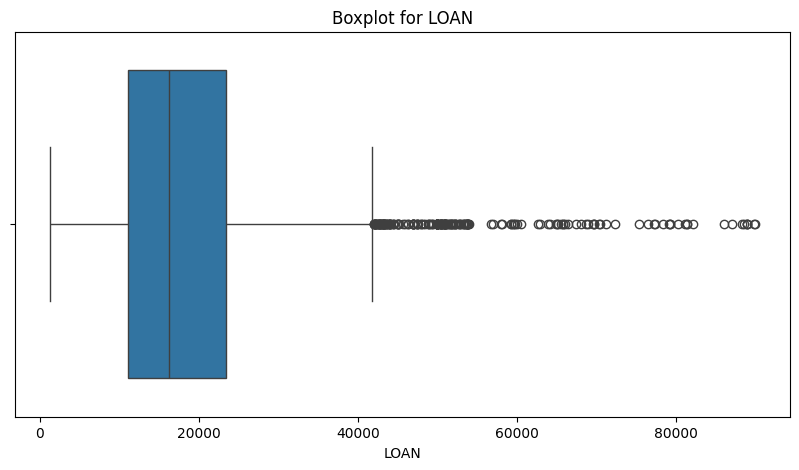

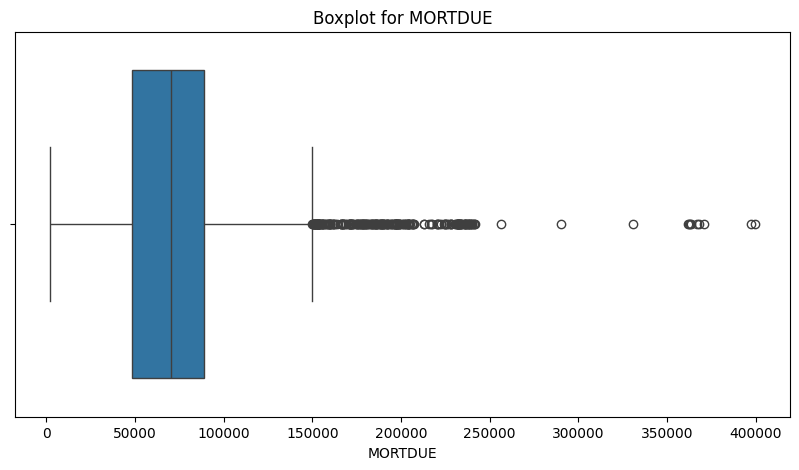

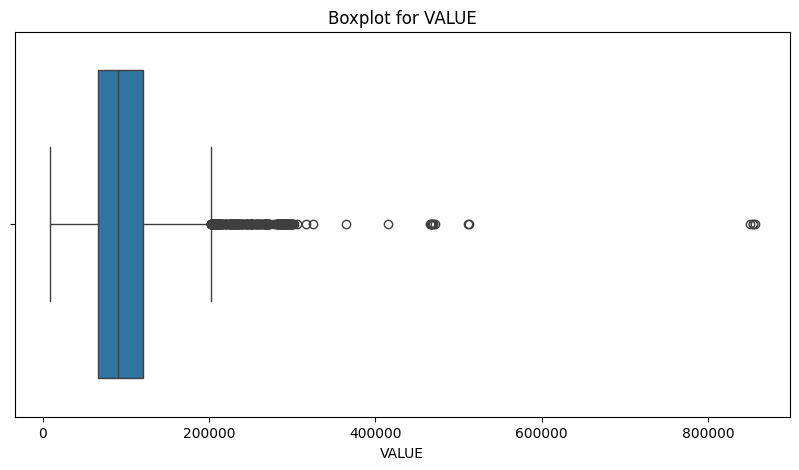

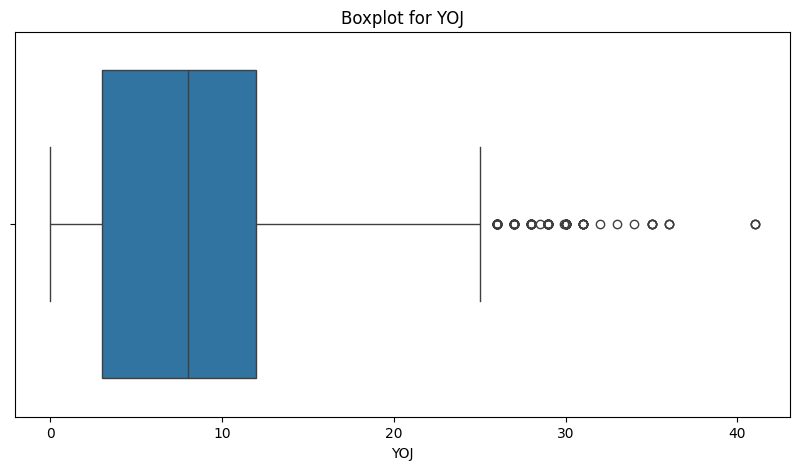

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 5)

data = dataset.copy()

for feature in data_col:
    sns.boxplot(x=data[feature])
    plt.xlabel(feature)
    plt.title(f'Boxplot for {feature}')
    plt.show()


In [70]:

# data_col listesini oluşturun (örnek isimlerle)
data_col = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ']

# Her bir sürekli numerik değişken için outlier'ları baskılayan bir for döngüsü
for column in data_col:
    # Alt ve üst sınırları belirleyin (örneğin, 5. ve 95. percentil)
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)

    IQR = q3 - q1

    lower_limit = q1 - 1.5*IQR
    upper_limit = q3 + 1.5*IQR

    # Alt sınırdan küçük olan değerleri alt sınıra eşitle
    dataset[column] = dataset[column].apply(lambda x: lower_limit if x < lower_limit else x)

    # Üst sınırdan büyük olan değerleri üst sınıra eşitle
    dataset[column] = dataset[column].apply(lambda x: upper_limit if x > upper_limit else x)

# Sonuçları göster
dataset[data_col].head()


,LOAN,MORTDUE,VALUE,YOJ
0,40000.0,134029.0,191990.0,8.868442
1,25500.0,113204.0,184561.0,17.000000
2,26000.0,20119.0,54563.0,24.000000
3,8700.0,77377.0,97070.0,3.000000
4,15800.0,51281.0,144202.0,1.000000


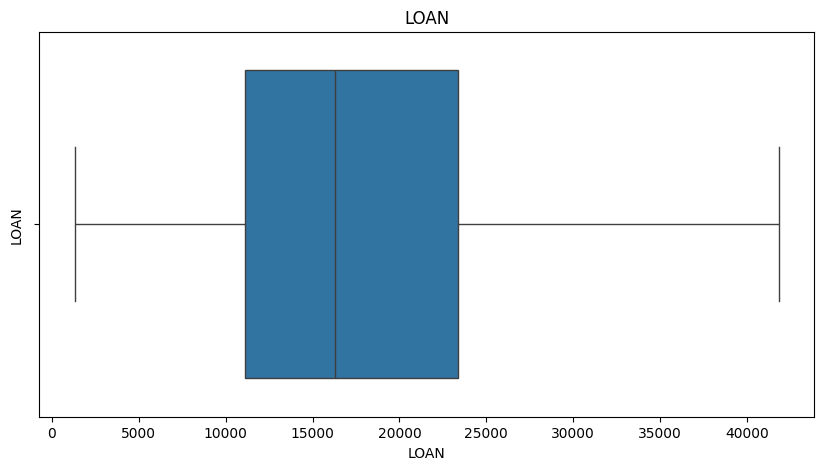

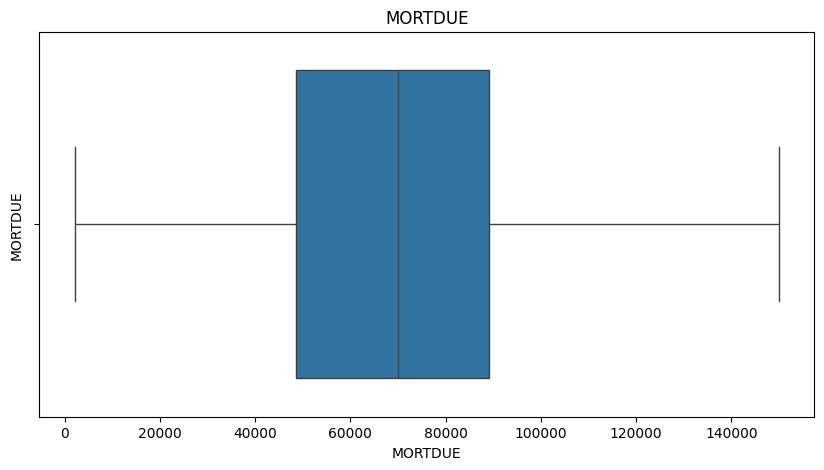

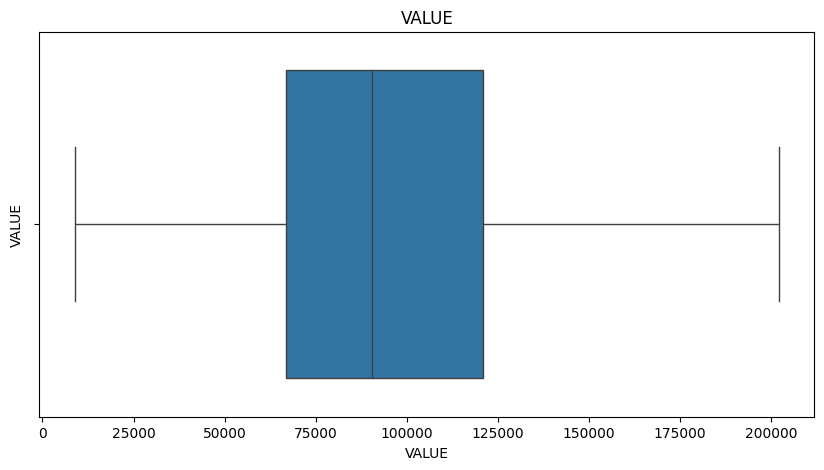

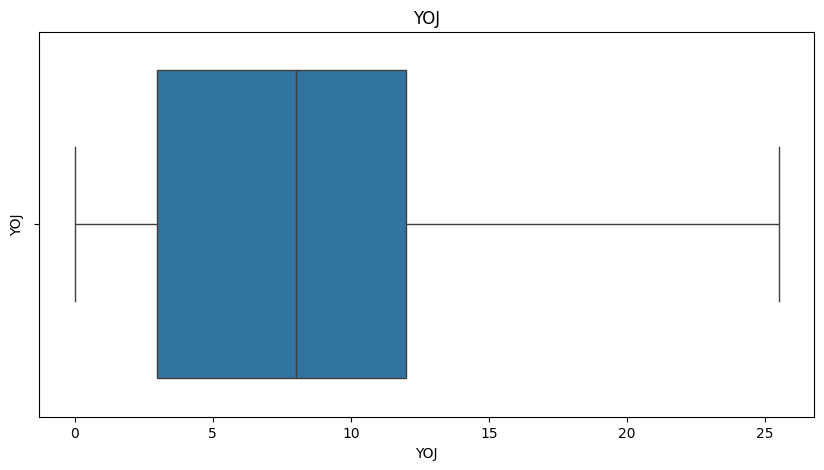

In [71]:
for feature in data_col:
    # data.boxplot(column=feature)
    sns.boxplot(dataset[feature], orient='h')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

## Dağılımı Gözlemleme ve Dönüşümler

In [72]:
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.special import boxcox1p

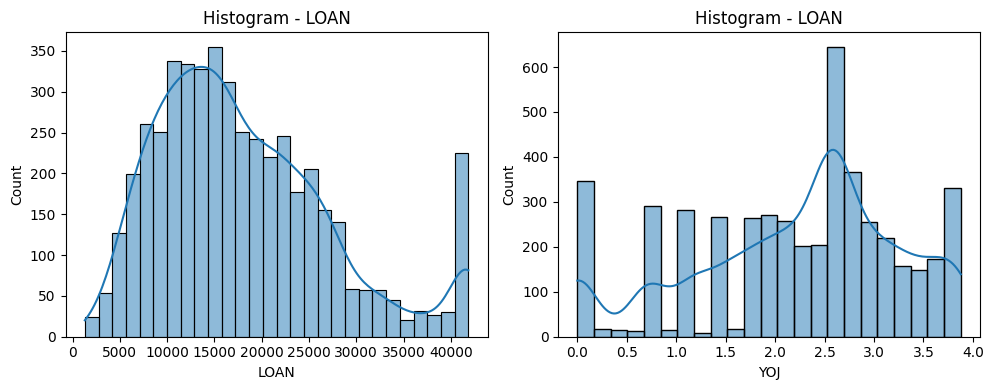

LOAN: Çarpıklık (Skewness): 0.8366138559219054, Basıklık (Kurtosis): 0.2806110016051444


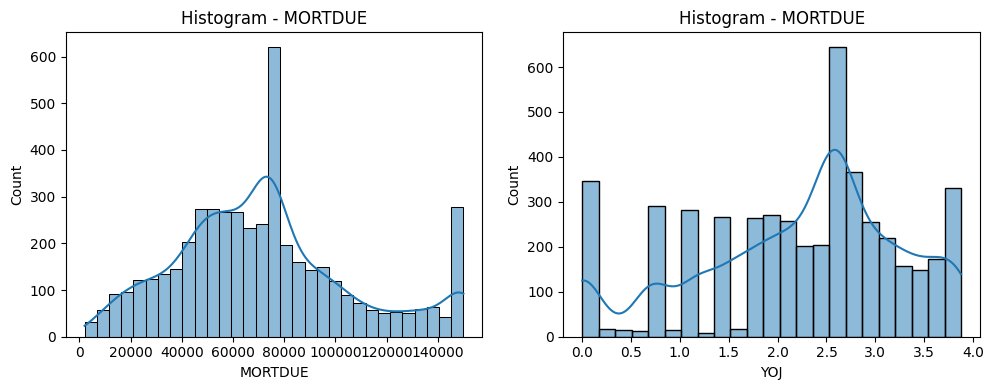

MORTDUE: Çarpıklık (Skewness): 0.5539057810169343, Basıklık (Kurtosis): -0.0867064048631816


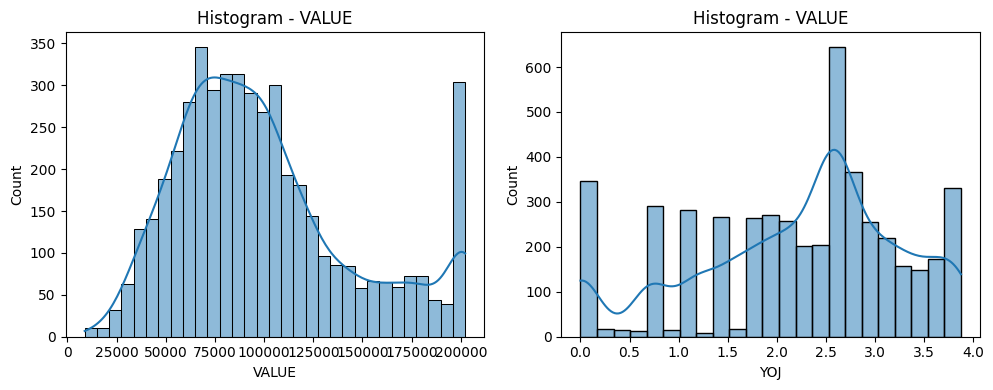

VALUE: Çarpıklık (Skewness): 0.7779604682016728, Basıklık (Kurtosis): -0.09582367560721394


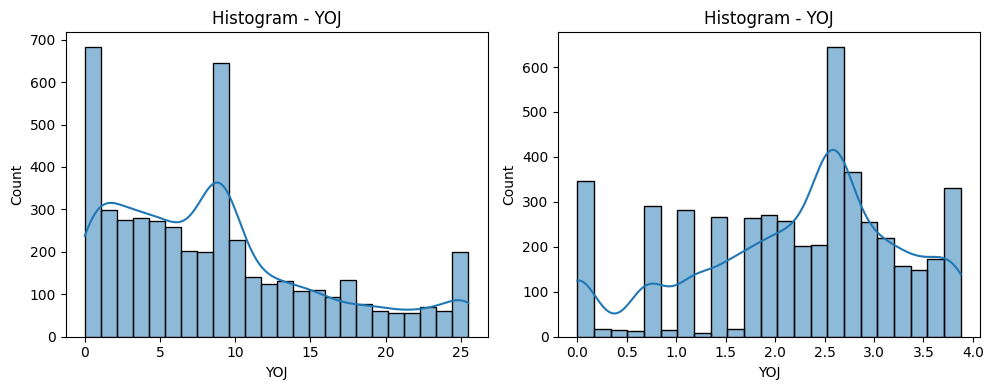

YOJ: Çarpıklık (Skewness): 0.8409857496674839, Basıklık (Kurtosis): -0.057116215156606476


In [73]:
# Her sütun için çarpıklık ve basıklık değerlerini görselleştir
for column in dataset[data_col]:
    skewness = skew(dataset[column])
    kurt = kurtosis(dataset[column])

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    sns.histplot(dataset[column], ax=axes[0], kde=True)
    axes[0].set_title(f'Histogram - {column}')

    # sns.histplot(np.log(dataset[column]), ax=axes[1], kde=True)
    # axes[1].set_title(f'Histogram - {column}')

    # sns.histplot(1/dataset[feature], ax=axes[1], kde=True)
    # axes[1].set_title(f'Histogram - {column}')

    #sns.histplot(dataset[feature]**2, ax=axes[1], kde=True)
    #axes[1].set_title(f'Histogram - {column}')

    sns.histplot(boxcox1p(dataset[feature], 0.1), ax=axes[1], kde=True)
    axes[1].set_title(f'Histogram - {column}')

    # sns.boxplot(x=dataset[column], ax=axes[1])
    # axes[1].set_title(f'Boxplot - {column}')

    plt.tight_layout()
    plt.show()

    print(f"{column}: Çarpıklık (Skewness): {skewness}, Basıklık (Kurtosis): {kurt}")

In [74]:
dataset.head(10)

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD,TOTAL_DQ_INQ,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,34.521450,40000.0,134029.0,191990.00000,8.868442,1.0,0.0,178.780960,0.0,24.0,0,0.0,0,0,0,0,0,0
1,34.357866,25500.0,113204.0,184561.00000,17.000000,1.0,0.0,308.958198,1.0,31.0,0,1.0,0,0,0,0,1,0
2,25.623639,26000.0,20119.0,54563.00000,24.000000,0.0,0.0,126.987959,0.0,11.0,0,0.0,0,0,1,0,0,0
3,38.217726,8700.0,77377.0,97070.00000,3.000000,0.0,0.0,68.854877,2.0,24.0,0,2.0,0,0,0,0,0,0
4,41.538051,15800.0,51281.0,144202.00000,1.000000,0.0,0.0,285.997898,4.0,43.0,0,4.0,0,0,1,0,0,0
5,0.000000,12000.0,44000.0,59500.00000,3.700000,0.0,0.0,172.500000,0.0,14.0,0,0.0,0,0,1,0,0,0
6,38.582670,12000.0,84172.0,123415.00000,9.000000,0.0,0.0,139.018449,1.0,21.0,0,1.0,0,1,0,0,0,0
7,40.932767,11900.0,63833.0,102884.60909,3.000000,0.0,0.0,0.000000,0.0,0.0,1,0.0,0,0,1,0,0,0
8,24.470300,13400.0,78465.0,97506.00000,5.000000,3.0,0.0,71.443665,1.0,21.0,0,1.0,0,0,1,0,0,0
9,40.152144,18000.0,107546.0,176314.00000,6.000000,0.0,0.0,218.019386,3.0,23.0,0,3.0,0,1,0,0,0,0


## Splitting the dataset into the Training set and Test set

In [75]:
from sklearn.model_selection import train_test_split
import numpy as np
#from tensorflow.keras.utils import to_categorical

X = dataset.drop('BAD', axis=1)
y = dataset['BAD']  # Etiketleri direkt olarak alın
print(y)


0       0
1       0
2       0
3       0
4       0
       ..
4763    0
4764    1
4765    0
4766    1
4767    0
Name: BAD, Length: 4768, dtype: int64


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [77]:
# modeli compile edelim
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(128, input_shape=(17,), activation="relu"))
model.add(Dense(64,  activation="relu"))
model.add(Dense(32,  activation="relu"))
model.add(Dense(1, activation="sigmoid"))  # Son katmandaki çıkış nöron sayısını 1 olarak değiştirin
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])  # Kayıp fonksiyonunu "binary_crossentropy" olarak değiştirin
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               2304      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12673 (49.50 KB)
Trainable params: 12673 (49.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
model.fit(X_train, y_train, epochs=20, verbose=1)

Epoch 1/20


120/120 [==============================] - 1s 2ms/step - loss: 158.3649 - accuracy: 0.6694
Epoch 2/20
120/120 [==============================] - 0s 2ms/step - loss: 54.6973 - accuracy: 0.6901
Epoch 3/20
120/120 [==============================] - 0s 2ms/step - loss: 50.5292 - accuracy: 0.6995
Epoch 4/20
120/120 [==============================] - 0s 2ms/step - loss: 49.7743 - accuracy: 0.6930
Epoch 5/20
120/120 [==============================] - 0s 2ms/step - loss: 63.6962 - accuracy: 0.6922
Epoch 6/20
120/120 [==============================] - 0s 2ms/step - loss: 43.3441 - accuracy: 0.6993
Epoch 7/20
120/120 [==============================] - 0s 2ms/step - loss: 38.9417 - accuracy: 0.6893
Epoch 8/20
120/120 [==============================] - 0s 1ms/step - loss: 30.1506 - accuracy: 0.6953
Epoch 9/20
120/120 [==============================] - 0s 1ms/step - loss: 39.3225 - accuracy: 0.6990
Epoch 10/20
120/120 [==============================] - 0s 1ms/step - loss: 37.2329 - accuracy: 0.6959

In [79]:
accuracy = model.evaluate(X_test, y_test)[1]

30/30 [==============================] - 0s 1ms/step - loss: 3.7312 - accuracy: 0.7914


In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
final_model= model = Sequential()
final_model.add(Dense(128, input_shape=(17,), activation="relu"))
final_model.add(Dense(64,  activation="relu"))
final_model.add(Dense(32,  activation="relu"))
final_model.add(Dense(1, activation="sigmoid"))  # Son katmandaki çıkış nöron sayısını 1 olarak değiştirin
final_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])  # Kayıp fonksiyonunu "binary_crossentropy" olarak değiştirin
final_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               2304      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12673 (49.50 KB)
Trainable params: 12673 (49.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
final_model.fit(X, y, epochs=20, verbose=1)

Epoch 1/20
149/149 [==============================] - 1s 2ms/step - loss: 385.5602 - accuracy: 0.6831
Epoch 2/20
149/149 [==============================] - 0s 2ms/step - loss: 185.1662 - accuracy: 0.6844
Epoch 3/20
149/149 [==============================] - 0s 2ms/step - loss: 122.9873 - accuracy: 0.6957
Epoch 4/20
149/149 [==============================] - 0s 3ms/step - loss: 96.2647 - accuracy: 0.6969
Epoch 5/20
149/149 [==============================] - 0s 2ms/step - loss: 63.2701 - accuracy: 0.6986
Epoch 6/20
149/149 [==============================] - 0s 2ms/step - loss: 82.6743 - accuracy: 0.6915
Epoch 7/20
149/149 [==============================] - 0s 2ms/step - loss: 44.6466 - accuracy: 0.7024
Epoch 8/20
149/149 [==============================] - 0s 2ms/step - loss: 55.2952 - accuracy: 0.7087
Epoch 9/20
149/149 [==============================] - 0s 2ms/step - loss: 44.1054 - accuracy: 0.7085
Epoch 10/20
149/149 [==============================] - 0s 2ms/step - loss: 66.7358 - acc

# UNSEEN DATA

In [82]:
unseen = pd.read_csv('test2023.csv')
unseen.head()

,index,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,4768,22.065764,25800,NaN,63456.0,DebtCon,Other,25.0,0.0,0.0,148.816285,0.0,8.0
1,4769,20.380464,16400,62018.0,91832.0,DebtCon,ProfExe,9.0,0.0,0.0,202.322500,0.0,19.0
2,4770,29.476003,22400,18371.0,38311.0,DebtCon,Other,1.0,0.0,0.0,37.235000,2.0,3.0
3,4771,NaN,33400,59000.0,85000.0,HomeImp,Self,2.0,0.0,7.0,240.433333,3.0,26.0
4,4772,29.045964,23000,71902.0,101750.0,HomeImp,Other,5.0,0.0,0.0,214.389252,0.0,13.0


In [83]:
# Gereksiz alanlar drop edilir
unseen.drop("index", axis=1, inplace=True)
unseen.head()

,DEBTINC,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,22.065764,25800,NaN,63456.0,DebtCon,Other,25.0,0.0,0.0,148.816285,0.0,8.0
1,20.380464,16400,62018.0,91832.0,DebtCon,ProfExe,9.0,0.0,0.0,202.322500,0.0,19.0
2,29.476003,22400,18371.0,38311.0,DebtCon,Other,1.0,0.0,0.0,37.235000,2.0,3.0
3,NaN,33400,59000.0,85000.0,HomeImp,Self,2.0,0.0,7.0,240.433333,3.0,26.0
4,29.045964,23000,71902.0,101750.0,HomeImp,Other,5.0,0.0,0.0,214.389252,0.0,13.0


In [84]:
## Looking data shape
print(unseen.shape)

(1192, 12)


In [85]:
unseen.isnull().sum().sort_values(ascending=False)

DEBTINC    240
DEROG      133
MORTDUE    115
DELINQ     112
YOJ        104
NINQ        94
CLAGE       71
JOB         61
REASON      52
CLNO        46
VALUE       24
LOAN         0
dtype: int64

In [86]:
## burada her değişkenin içindeki eksik değer oranını buluyoruz
## 1- eksik değerleri olan özelliklerin listesini yapın
features_with_na=[features for features in unseen.columns if unseen[features].isnull().sum()>0]
## 2- özellik adını ve eksik değerlerin yüzdesini yazdırın

for feature in features_with_na:
    print(feature, np.round(unseen[feature].isnull().mean(), 4),  ' % eksik değer')

DEBTINC 0.2013  % eksik değer
MORTDUE 0.0965  % eksik değer
VALUE 0.0201  % eksik değer
REASON 0.0436  % eksik değer
JOB 0.0512  % eksik değer
YOJ 0.0872  % eksik değer
DEROG 0.1116  % eksik değer
DELINQ 0.094  % eksik değer
CLAGE 0.0596  % eksik değer
NINQ 0.0789  % eksik değer
CLNO 0.0386  % eksik değer


In [87]:
import missingno as msn

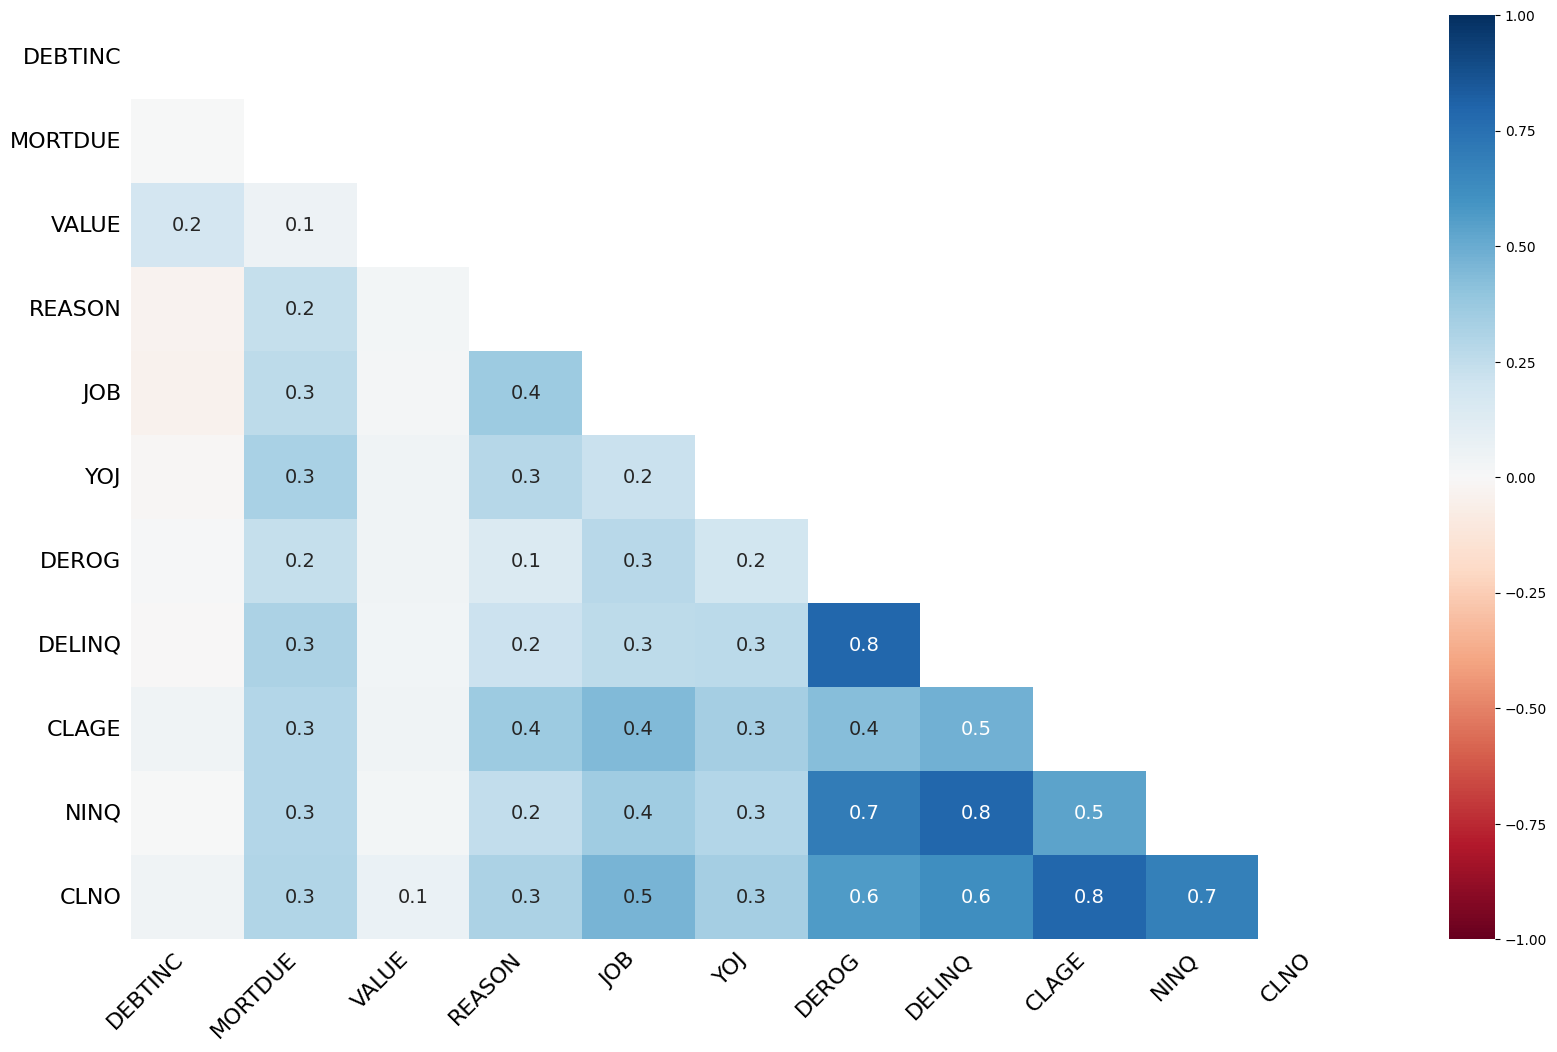

In [88]:
# fig = plt.figure(figsize =(10, 6))
# Nullity Correlation
msn.heatmap(unseen[features_with_na]);

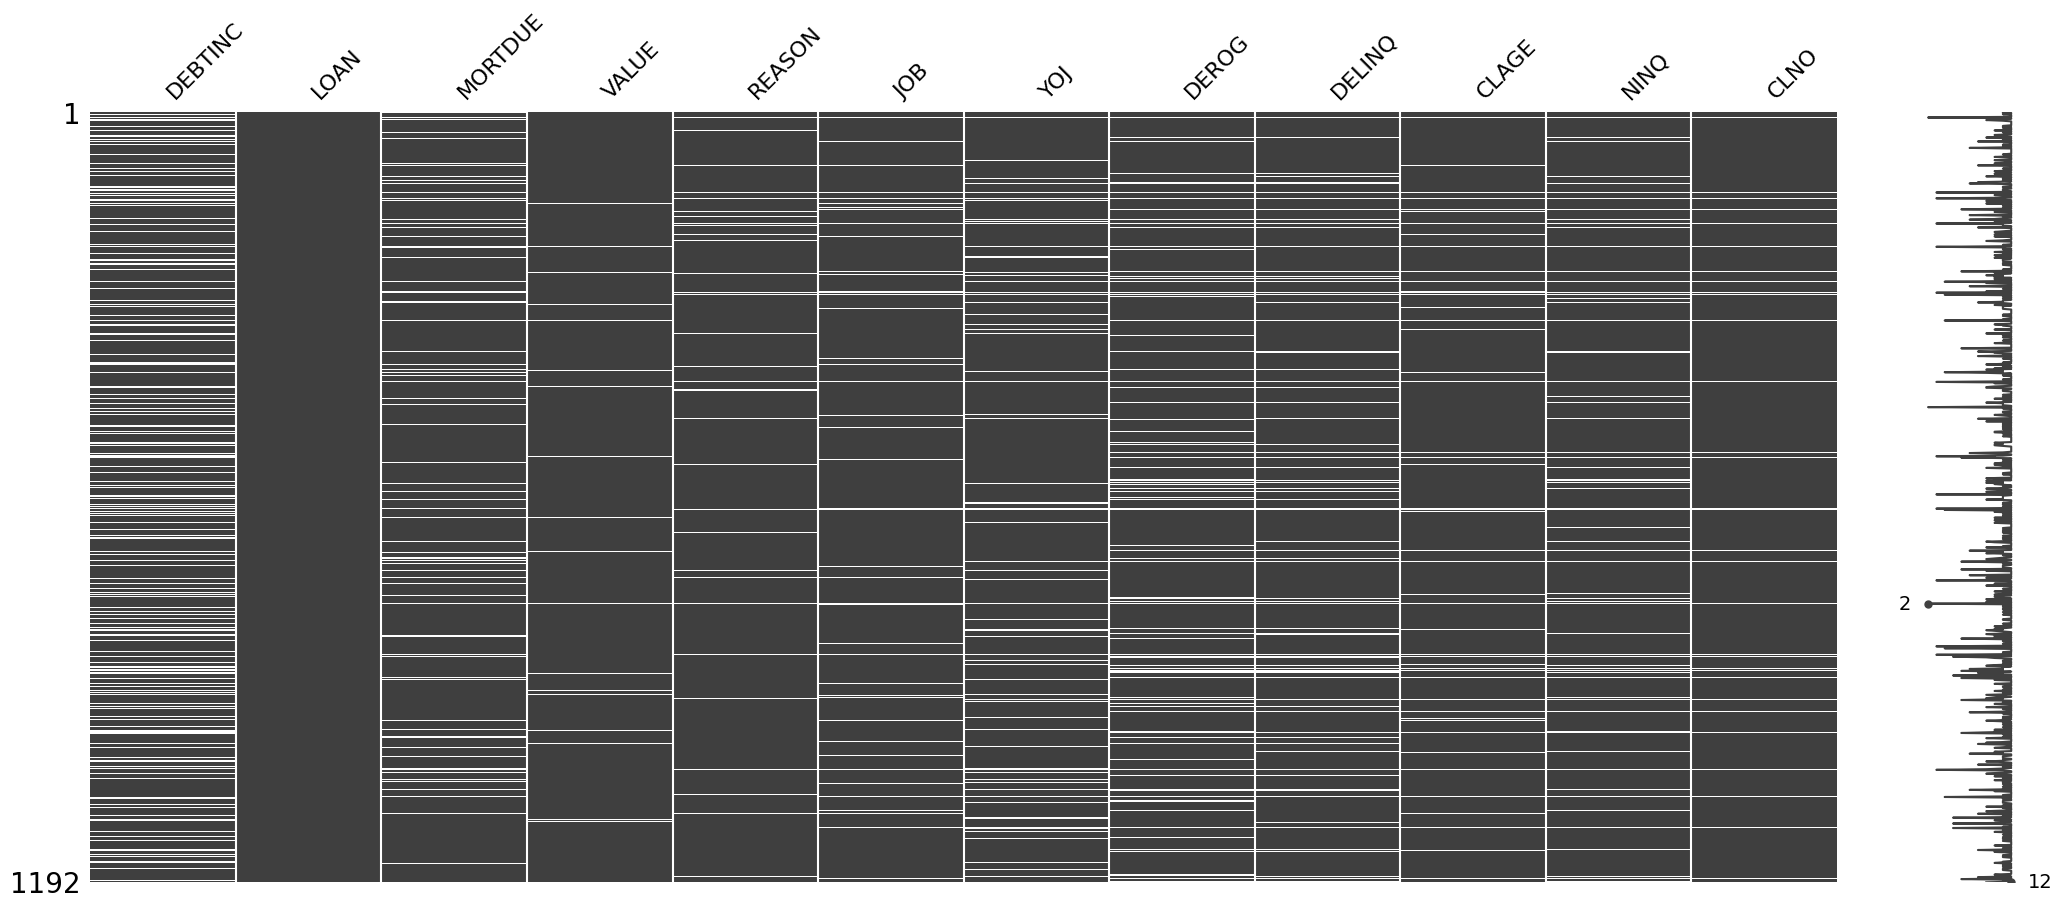

In [89]:
msn.matrix(unseen);

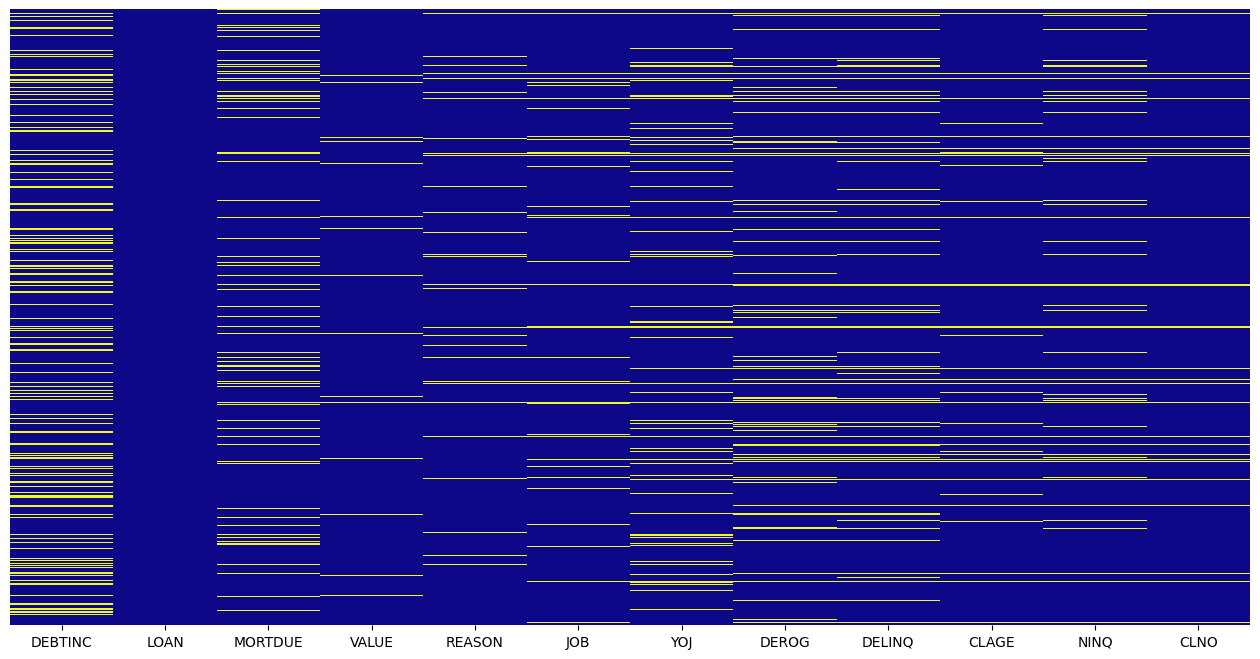

In [90]:
plt.rcParams["figure.figsize"] = (16, 8)
sns.heatmap(unseen.isnull(), yticklabels=False, cbar=False, cmap="plasma");

##Missing value

In [91]:
#CLNO sutunu ile CLAGE bir biri ile bagli ve NINQ   CLAGE: Ay cinsinden en eski kredi limitinin yaşı, NINQ: Son kredi sorgularının sayısı, CLNO: Kredi limiti sayısı
# CLNO sütunundaki NaN değerlere 0 verme
unseen["CLNO"].fillna(0, inplace=True)

# CLNO sütunundaki 0 değerine denk gelen satırların CLAGE sütunundaki NaN değerlerini 0 ile doldurma
unseen.loc[unseen["CLNO"] == 0, "CLAGE"] = 0

# Geri kalan NaN değerlere ilgili sütunların ortalamasını uygulama
columns_to_fillna_mean = ["CLAGE"]
for column in columns_to_fillna_mean:
    unseen[column].fillna(unseen[column].mean(), inplace=True)


In [92]:
#Toplam Geciken Kredi ve Sorgu Sayısı:NINQ ve DELINQ'yi toplam geciken kredi ve sorgu sayısını temsil eden bir değişkenle değiştirlebili gibi
unseen['NINQ'].fillna(0, inplace=True)
unseen['DELINQ'].fillna(0, inplace=True)
unseen['TOTAL_DQ_INQ'] = unseen['DELINQ'] + unseen['NINQ']

In [93]:
# buyuk asaglayci rapor anlaminda, man yerine 0 atamak mantikli geldi
unseen['DEROG'].fillna(0, inplace=True)

In [94]:
unseen['DEBTINC'].fillna(0, inplace=True)

In [95]:
#numeric variables
columns_to_fillna = [ "MORTDUE", "YOJ", "VALUE"]

for column in columns_to_fillna:
    unseen[column].fillna(unseen[column].mean(), inplace=True)


One hot encoding for categoric features

In [96]:
unseen = pd.get_dummies(unseen, columns=["REASON", "JOB"], prefix=["REASON", "JOB"], drop_first=True)

In [97]:
# True ve False değerlerini 1 ve 0 olarak değiştirme
unseen['REASON_HomeImp'] = unseen['REASON_HomeImp'].replace({True: 1, False: 0})
unseen['JOB_Office'] = unseen['JOB_Office'].replace({True: 1, False: 0})
unseen['JOB_ProfExe'] = unseen['JOB_ProfExe'].replace({True: 1, False: 0})
unseen['JOB_Sales'] = unseen['JOB_Sales'].replace({True: 1, False: 0})
unseen['JOB_Self'] = unseen['JOB_Self'].replace({True: 1, False: 0})
unseen['JOB_Other'] = unseen['JOB_Other'].replace({True: 1, False: 0})


In [98]:
unseen['REASON_HomeImp'].fillna(0, inplace=True)
unseen['JOB_Office'].fillna(0, inplace=True)
unseen['JOB_ProfExe'].fillna(0, inplace=True)
unseen['JOB_Sales'].fillna(0, inplace=True)
unseen['JOB_Self'].fillna(0, inplace=True)
unseen['JOB_Other'].fillna(0, inplace=True)


In [99]:
# Eksik değer kontrolü
unseen.isnull().sum().sum()

0

## Outliers

In [100]:
# Sütunlara isim verme
data_col = unseen[['LOAN', 'MORTDUE', 'VALUE', 'YOJ']]

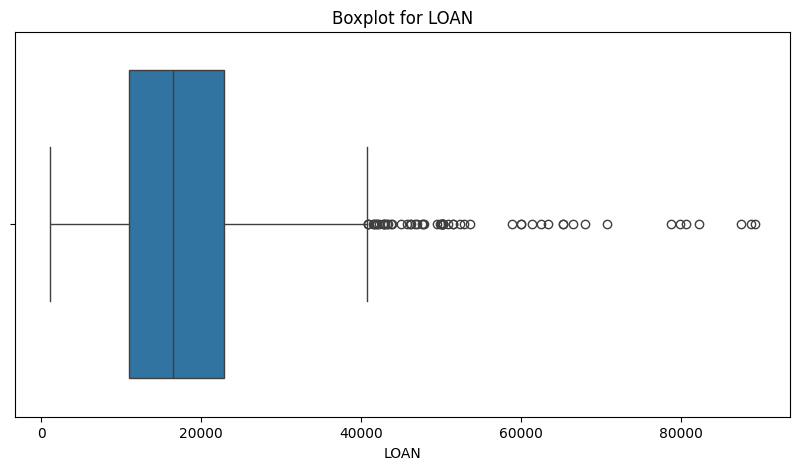

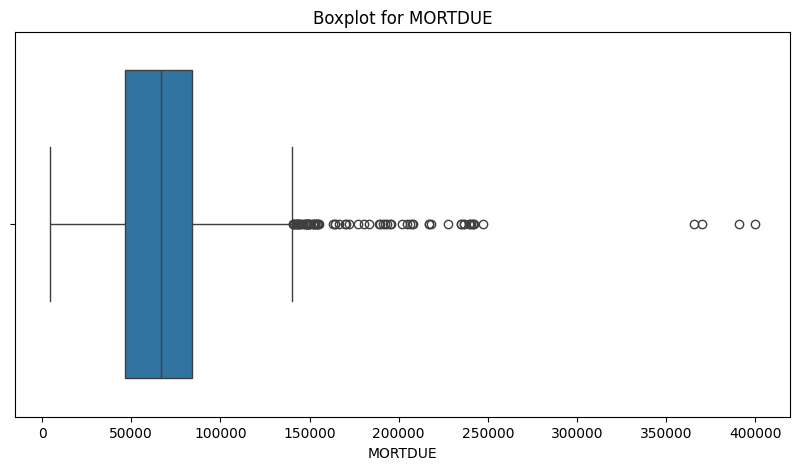

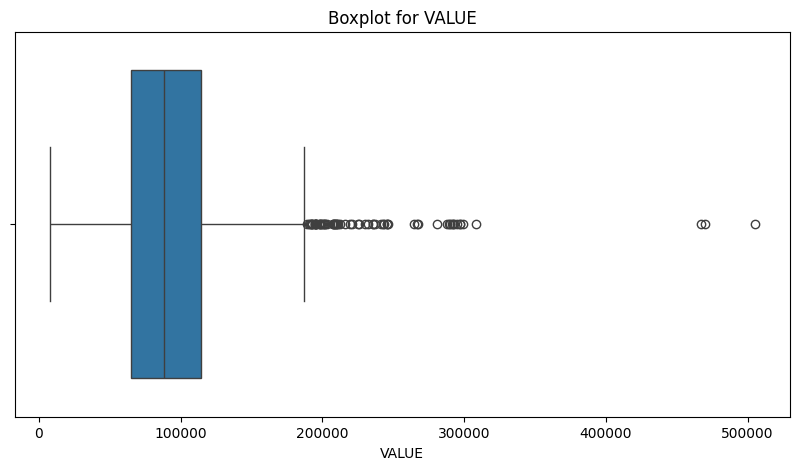

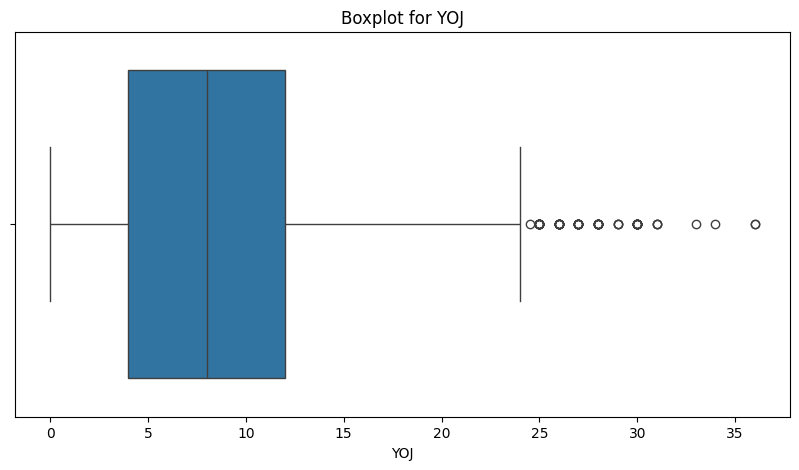

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 5)

datatest = unseen.copy()

for feature in data_col:
    sns.boxplot(x=datatest[feature])
    plt.xlabel(feature)
    plt.title(f'Boxplot for {feature}')
    plt.show()


In [102]:
# data_col listesini oluşturun (örnek isimlerle)
data_col = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ']

# Her bir sürekli numerik değişken için outlier'ları baskılayan bir for döngüsü
for column in data_col:
    # Alt ve üst sınırları belirleyin (örneğin, 5. ve 95. percentil)
    q1 = unseen[column].quantile(0.25)
    q3 = unseen[column].quantile(0.75)

    IQR = q3 - q1

    lower_limit = q1 - 1.5*IQR
    upper_limit = q3 + 1.5*IQR

    # Alt sınırdan küçük olan değerleri alt sınıra eşitle
    unseen[column] = unseen[column].apply(lambda x: lower_limit if x < lower_limit else x)

    # Üst sınırdan büyük olan değerleri üst sınıra eşitle
    unseen[column] = unseen[column].apply(lambda x: upper_limit if x > upper_limit else x)

# Sonuçları göster
unseen[data_col].head()


,LOAN,MORTDUE,VALUE,YOJ
0,25800.0,71759.366722,63456.0,24.0
1,16400.0,62018.000000,91832.0,9.0
2,22400.0,18371.000000,38311.0,1.0
3,33400.0,59000.000000,85000.0,2.0
4,23000.0,71902.000000,101750.0,5.0


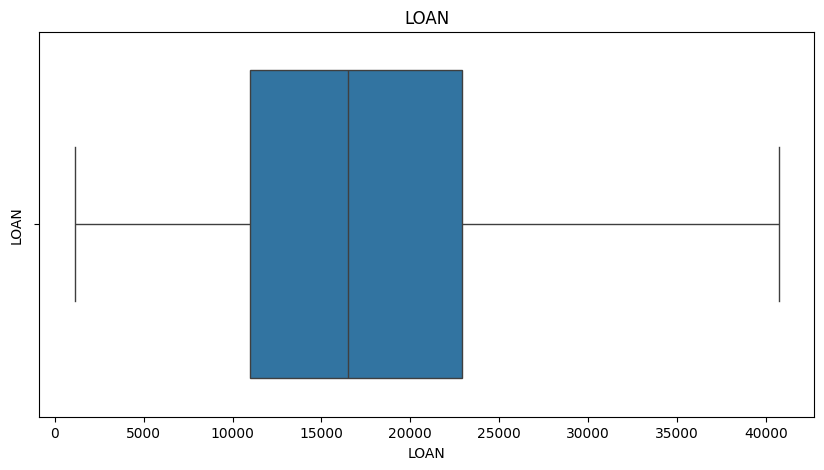

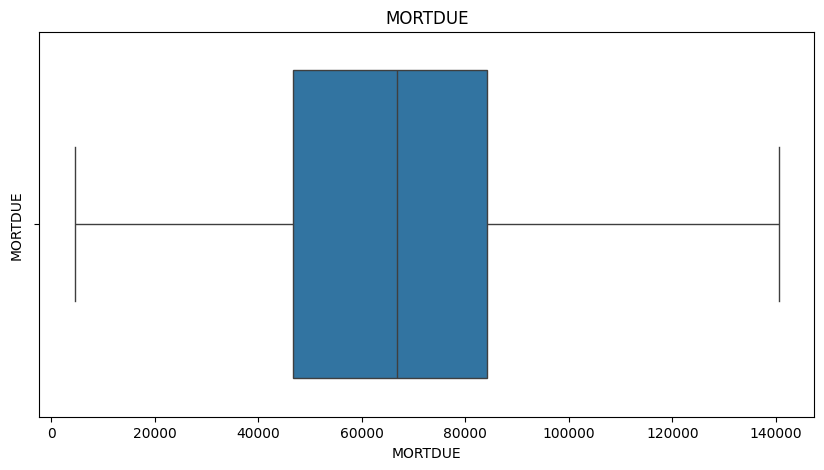

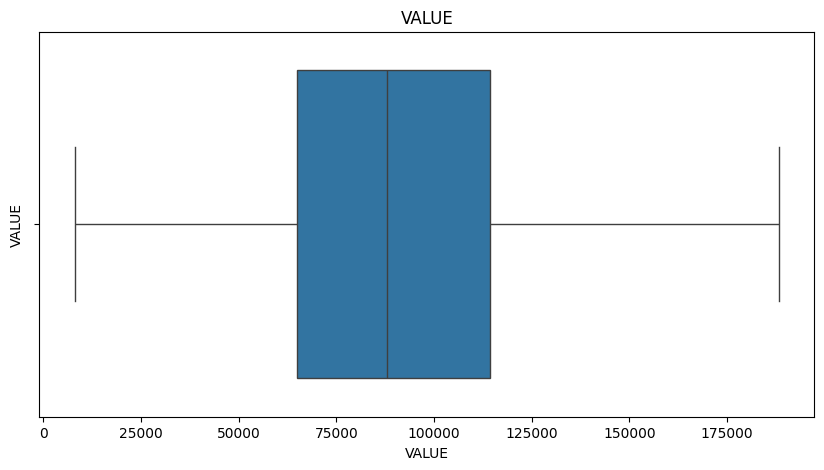

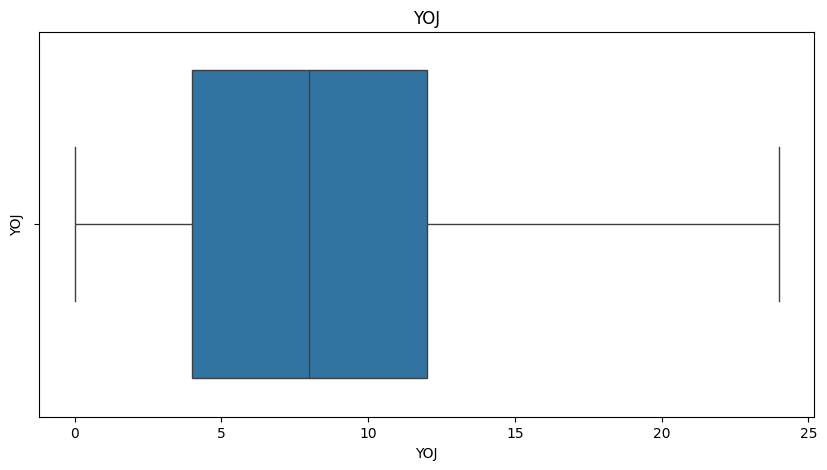

In [103]:
for feature in data_col:
    # data.boxplot(column=feature)
    sns.boxplot(unseen[feature], orient='h')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

## Dağılımı Gözlemleme ve Dönüşümler

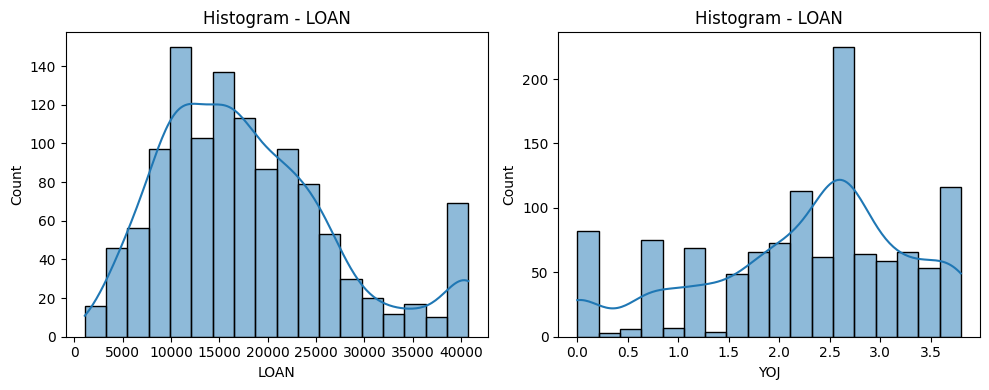

LOAN: Çarpıklık (Skewness): 0.8187006433080604, Basıklık (Kurtosis): 0.2556660793768173


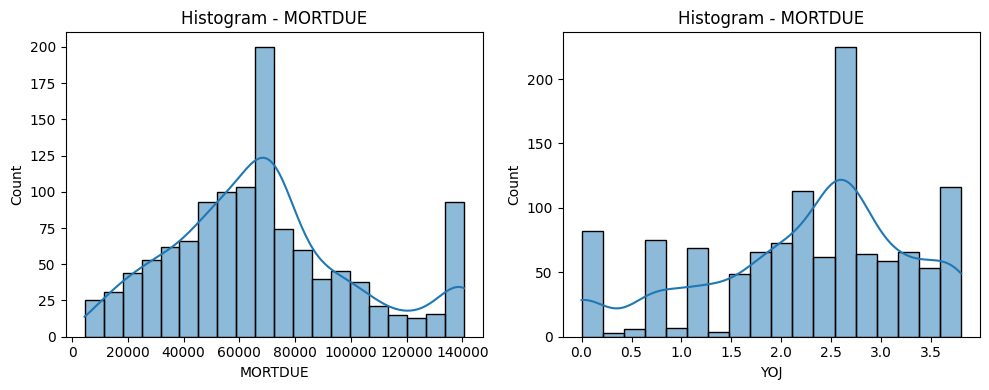

MORTDUE: Çarpıklık (Skewness): 0.5285817736822329, Basıklık (Kurtosis): -0.11780144723959074


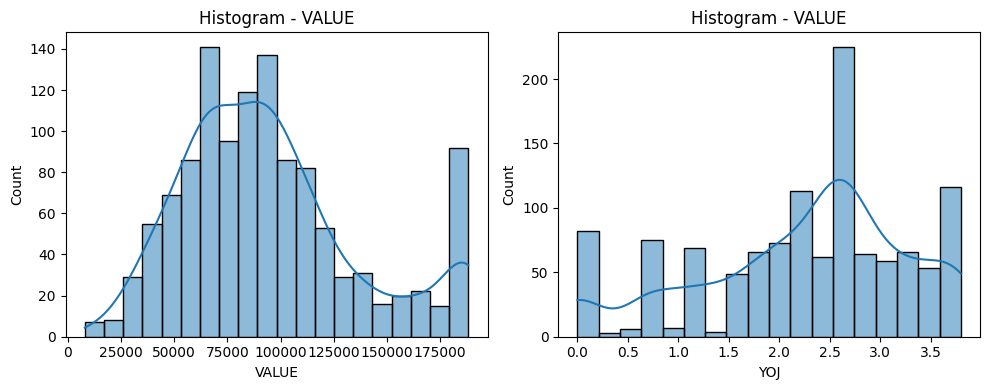

VALUE: Çarpıklık (Skewness): 0.7332111751432847, Basıklık (Kurtosis): -0.022361540176392136


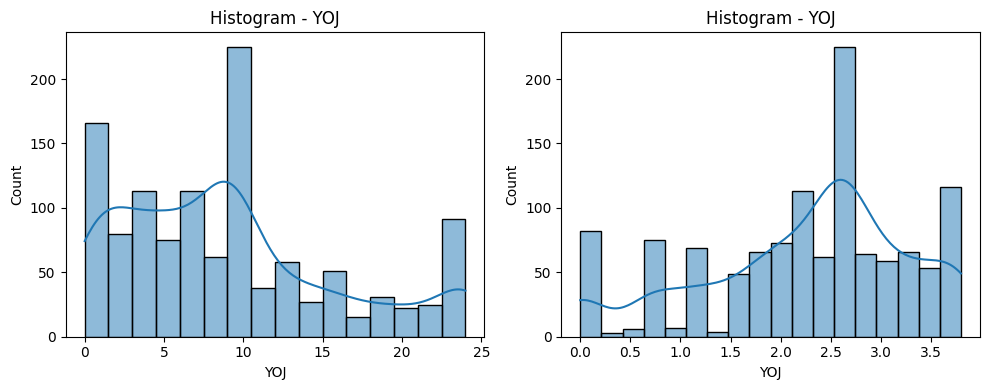

YOJ: Çarpıklık (Skewness): 0.7634862420890572, Basıklık (Kurtosis): -0.24846465315075417


In [104]:
# Her sütun için çarpıklık ve basıklık değerlerini görselleştir
for column in unseen[data_col]:
    skewness = skew(unseen[column])
    kurt = kurtosis(unseen[column])

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    sns.histplot(unseen[column], ax=axes[0], kde=True)
    axes[0].set_title(f'Histogram - {column}')

    # sns.histplot(np.log(dataset[column]), ax=axes[1], kde=True)
    # axes[1].set_title(f'Histogram - {column}')

    # sns.histplot(1/dataset[feature], ax=axes[1], kde=True)
    # axes[1].set_title(f'Histogram - {column}')

    #sns.histplot(dataset[feature]**2, ax=axes[1], kde=True)
    #axes[1].set_title(f'Histogram - {column}')

    sns.histplot(boxcox1p(unseen[feature], 0.1), ax=axes[1], kde=True)
    axes[1].set_title(f'Histogram - {column}')

    # sns.boxplot(x=dataset[column], ax=axes[1])
    # axes[1].set_title(f'Boxplot - {column}')

    plt.tight_layout()
    plt.show()

    print(f"{column}: Çarpıklık (Skewness): {skewness}, Basıklık (Kurtosis): {kurt}")

In [105]:
unseen.head(10)

,DEBTINC,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,TOTAL_DQ_INQ,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,22.065764,25800.0,71759.366722,63456.0,24.000000,0.0,0.0,148.816285,0.0,8.0,0.0,0,0,1,0,0,0
1,20.380464,16400.0,62018.000000,91832.0,9.000000,0.0,0.0,202.322500,0.0,19.0,0.0,0,0,0,1,0,0
2,29.476003,22400.0,18371.000000,38311.0,1.000000,0.0,0.0,37.235000,2.0,3.0,2.0,0,0,1,0,0,0
3,0.000000,33400.0,59000.000000,85000.0,2.000000,0.0,7.0,240.433333,3.0,26.0,10.0,1,0,0,0,0,1
4,29.045964,23000.0,71902.000000,101750.0,5.000000,0.0,0.0,214.389252,0.0,13.0,0.0,1,0,1,0,0,0
5,43.902303,18300.0,63351.000000,87645.0,1.000000,0.0,0.0,324.614647,3.0,15.0,3.0,0,0,1,0,0,0
6,17.747784,16500.0,36206.000000,53040.0,9.000000,0.0,0.0,118.301372,0.0,9.0,0.0,1,0,1,0,0,0
7,43.436334,16000.0,69861.000000,87086.0,7.000000,0.0,0.0,205.328046,2.0,18.0,2.0,0,0,1,0,0,0
8,0.000000,3100.0,71759.366722,70400.0,9.137822,0.0,0.0,0.000000,0.0,0.0,0.0,0,0,0,0,0,0
9,40.410051,35200.0,140614.750000,37079.0,2.000000,0.0,1.0,216.666637,2.0,50.0,3.0,0,0,0,0,0,0


In [106]:
print(unseen.shape)

(1192, 17)


In [107]:
# modelin performansini olcelim
all_data = model.evaluate(X, y)[1]

149/149 [==============================] - 0s 1ms/step - loss: 30.3589 - accuracy: 0.8014


In [108]:
performance = model.evaluate(unseen)[1]
performance

38/38 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


0.0

In [109]:
predss = model.predict(unseen)
predss

38/38 [==============================] - 0s 1ms/step


array([[0.0000000e+00],
       [0.0000000e+00],
       [2.0198397e-30],
       ...,
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00]], dtype=float32)

In [110]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,index,BAD
0,4768,0
1,4769,0
2,4770,0
3,4771,1
4,4772,0


In [111]:
sample['BAD'] = performance
sample

,index,BAD
0,4768,0.0
1,4769,0.0
2,4770,0.0
3,4771,0.0
4,4772,0.0
...,...,...
1187,5955,0.0
1188,5956,0.0
1189,5957,0.0
1190,5958,0.0


In [112]:
#sample.to_csv('submission.csv', index=None)